<a href="https://colab.research.google.com/github/jman4162/RF-and-Antenna-Tutorials/blob/main/Simulation_of_Dipole_Antennas_in_Python_Modeling_and_Visualization_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simulation of Dipole Antennas in Python: Modeling and Visualization Tutorial

Name: John Hodge

Date: 04/25/24

Dipole antennas are a fundamental component in the field of electromagnetics and wireless communications. An advanced lesson on dipole antennas covers topics such as their physical characteristics, radiation properties, and practical applications, focusing on key mathematical formulations and insights into performance optimization. Here’s a comprehensive overview:

### 1. **Physical Description and Basic Operation**
   - **Structure:** A dipole antenna typically consists of two identical conductive elements such as metal rods, each connected to a feeder at the middle. The total length of the dipole is usually about half a wavelength ($λ/2$) at the frequency of operation.
   - **Mode of Operation:** The antenna operates by radiating energy into the surrounding space when an alternating current flows through it, creating a standing wave along its length.

### 2. **Radiation Pattern**
   - **Omnidirectional:** In the plane perpendicular to the axis of the dipole, the radiation pattern is omnidirectional, resembling a "doughnut" shape.
   - **Polarization:** The dipole is linearly polarized along the axis of the elements.
   - **Directional Dependence:** Along the axis of the dipole (end-fire direction), the radiation is minimum, with the maximum radiation occurring in the plane orthogonal to this axis.

### 3. **Mathematical Analysis of Dipole Antennas**
   - **Current Distribution:** The current distribution along the dipole length is sinusoidal, peaking at the center and tapering to zero at the ends.
   - **Field Equations:**
     - **Electric Field (E-field):** Given by $ E(\theta) = \frac{j \eta I_0 e^{-jkr}}{2\pi r} \cos(\theta) $
     - **Magnetic Field (H-field):** $ H(\phi) = \frac{I_0 e^{-jkr}}{2\pi r} \cos(\theta) $
     - Here, \($\theta$\) and \($\phi$\) are the polar and azimuthal angles, respectively, \($\eta$\) is the intrinsic impedance of the medium, \($I_0$ \) is the current at the feed point, \($ r $\) is the distance from the antenna, and \($k$\) is the wave number.
   - **Input Impedance:** The real part of the input impedance of a resonant half-wave dipole is approximately 73 Ohms in free space, with a reactive component that ideally should be zero at resonance.

### 4. **Bandwidth and Impedance Matching**
   - **Bandwidth:** The bandwidth of a dipole antenna is limited and increases with decreasing Q-factor, which is influenced by the diameter of the dipole elements.
   - **Impedance Matching:** Techniques such as using a balun or impedance matching networks are employed to match the impedance of the antenna to that of the transmission line, minimizing reflection and maximizing power transfer.

### 5. **Variations and Practical Designs**
   - **Folded Dipole:** A variation where the conductors are folded back on themselves, increasing the input impedance approximately fourfold.
   - **Multiband and Wideband Dipoles:** These are designed to operate over multiple frequency bands or a broad frequency range, respectively, often using additional elements or specific geometric modifications.

### 6. **Applications**
   - **Broadcasting:** Both in radio and television.
   - **RFID and Sensing:** Short-range communication systems often use dipole antennas.
   - **Wireless Communications:** Used extensively in base stations and as simple, effective antennas for various wireless technologies.

This advanced discussion on dipole antennas illustrates the theoretical and practical aspects of their design and application, making them integral to modern wireless communication systems.

### 7. A Python Tutorial for Modeling Dipole Antennas

#### 7.1 Prerequisites Import Libraries

You can install these necessary libraries using pip:

In [22]:
!pip install numpy matplotlib

First, import the necessary libraries.

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#### 7.2 Define Constants and Parameters
Define the necessary constants and parameters for the antenna, such as the wavelength, wave number, and current distribution.

In [24]:
# Constants
frequency = 300e6  # Frequency in Hz (e.g., 300 MHz)
speed_of_light = 3e8  # Speed of light in vacuum (m/s)
wavelength = speed_of_light / frequency
wave_number = 2 * np.pi / wavelength
intrinsic_impedance = 377  # Ohm, approximately in free space

# Antenna parameters
current_I0 = 1  # Peak current in Amperes
length = wavelength / 2  # Length of the dipole

#### 7.3 Define the Dipole Current Distribution Function
The current distribution along the length of a half-wave dipole can be assumed to vary sinusoidally.

In [25]:
def current_distribution(z, length):
    return np.cos(np.pi * z / length)

#### 7.4 Calculate the Radiation Pattern
The radiation pattern depends on the angular distribution of radiated power. For simplicity, we'll consider the far-field approximation.

In [26]:
def radiation_pattern(theta, phi, length, wave_number, verbose=False):
    # Constants and array definitions
    integral_resolution = 1000
    length = 1.0  # Assuming some value for length
    theta_arr = np.linspace(0, np.pi, 100)
    z = np.linspace(-length / 2, length / 2, integral_resolution)
    current = current_distribution(z, length)
    wave_number = 1.0  # Assuming some value for wave_number
    intrinsic_impedance = 377  # Characteristic impedance of free space in ohms

    # Compute contributions for each theta in one go
    contributions = np.exp(-1j * wave_number * z * np.cos(theta[:, np.newaxis]))
    integral_results = np.trapz(current * contributions, z)
    E_theta = (integral_results * np.sin(theta)) / (4 * np.pi * intrinsic_impedance)
    results = np.abs(E_theta)**2  # Returning the power pattern

    if verbose:
      # Output results
      for theta, result in zip(theta_arr, results):
          print(f"Theta: {theta:.2f}, Result: {result}")

    return results

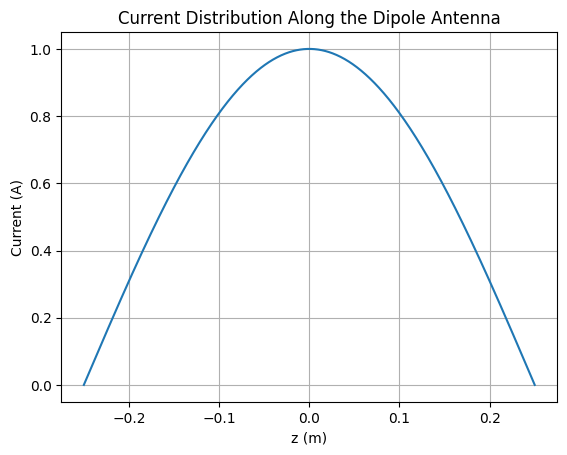

In [27]:
# Plot the current_distribution vs. z
z = np.linspace(-length / 2, length / 2, 1000)
current = current_distribution(z, length)
plt.plot(z, current)
plt.xlabel('z (m)')
plt.ylabel('Current (A)')
plt.title('Current Distribution Along the Dipole Antenna')
plt.grid(True)
plt.show()

#### 7.5 Generate the Radiation Pattern over a Sphere

In [28]:
theta = np.linspace(0, np.pi, 100)
phi = np.linspace(0, 2 * np.pi, 100)
THETA, PHI = np.meshgrid(theta, phi)
pattern = radiation_pattern(theta, phi, length, wave_number)
pattern_dB = 10 * np.log10(pattern)

# Convert to Cartesian coordinates for plotting
x = pattern * np.sin(THETA) * np.cos(PHI)
y = pattern * np.sin(THETA) * np.sin(PHI)
z = pattern * np.cos(THETA)

<ipython-input-28-5a6598f399d0>:5: RuntimeWarning: divide by zero encountered in log10
  pattern_dB = 10 * np.log10(pattern)


#### 7.6 Plotting the Radiation Pattern

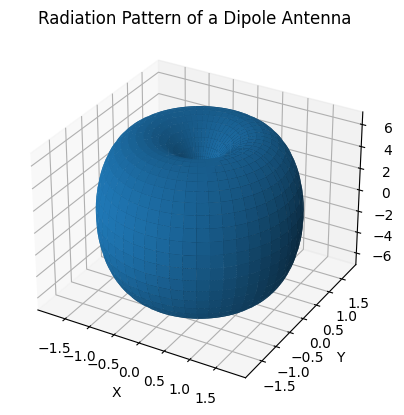

In [29]:
# Make a plot of theta vs. pattern
# Plot the radiation pattern in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Radiation Pattern of a Dipole Antenna')
plt.show()

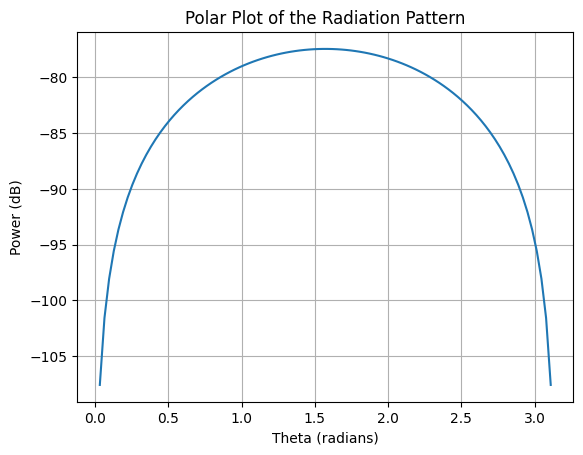

In [30]:
# Plot the radiation pattern in 2D (polar plot)
plt.figure()
plt.plot(theta[:-1], pattern_dB[:-1])
plt.xlabel('Theta (radians)')
plt.ylabel('Power (dB)')
plt.title('Polar Plot of the Radiation Pattern')
plt.grid(True)
plt.show()

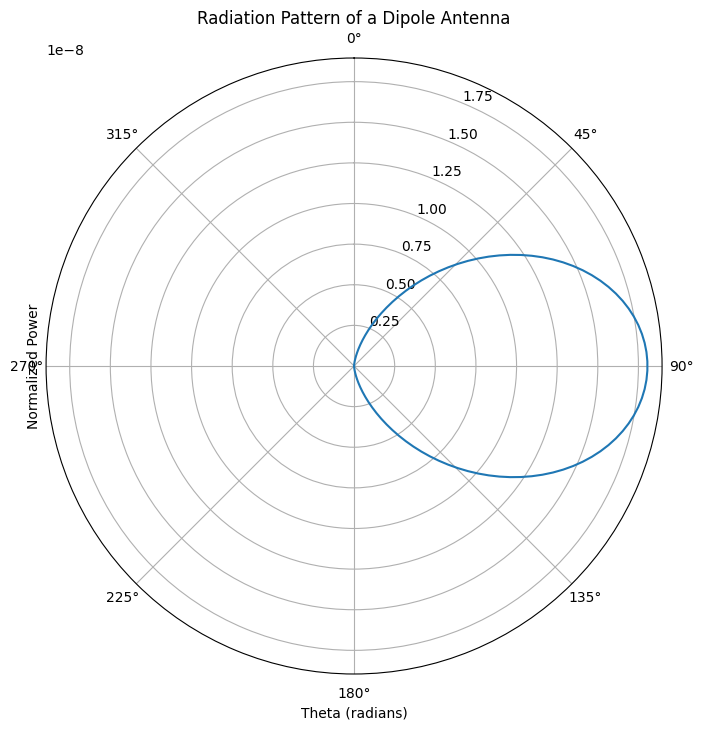

In [31]:
# Make a polar plot of theta vs. pattern
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='polar')
ax.plot(theta, pattern)
ax.set_title('Radiation Pattern of a Dipole Antenna')
ax.set_xlabel('Theta (radians)')
ax.set_ylabel('Normalized Power')
ax.set_theta_direction(-1)
ax.set_theta_zero_location('N')  # Set theta=0 to the top of the plot
plt.show()

# Conclusion

This Python tutorial provides a basic framework for simulating and visualizing the radiation pattern of a half-wave dipole antenna. By varying parameters like frequency, dipole length, and observing the changes in the radiation pattern, you can explore the complex behavior of antennas in wireless communications. This simulation can be extended to include more complex antenna designs and to incorporate additional effects such as ground presence and antenna feed characteristics.